# 1st Program

Q1 (25th percentile): 1050.0
Q3 (75th percentile): 1500.0
Interquartile Range (IQR): 450.0


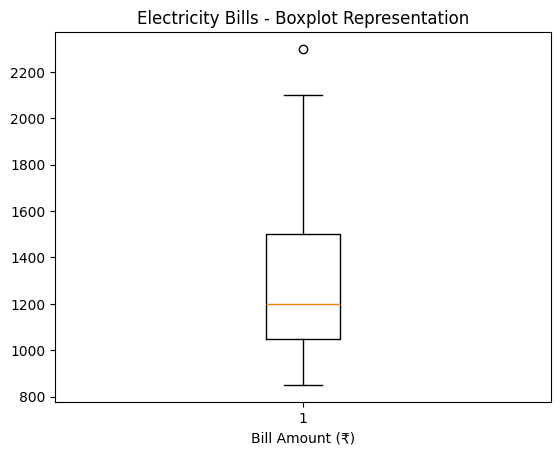

In [23]:
import numpy as np
import matplotlib.pyplot as plt

bills = [850, 900, 950, 980, 1000, 1020, 1050, 1075, 1100, 1125,
         1150, 1175, 1200, 1250, 1300, 1350, 1400, 1450, 1500,
         1600, 1700, 1800, 1900, 2100, 2300]

Q1 = np.percentile(bills, 25)
Q3 = np.percentile(bills, 75)
IQR = Q3 - Q1

print("Q1 (25th percentile):", Q1)
print("Q3 (75th percentile):", Q3)
print("Interquartile Range (IQR):", IQR)

plt.boxplot(bills)
plt.title("Electricity Bills - Boxplot Representation")
plt.xlabel("Bill Amount (₹)")
plt.show()

# 2nd Program

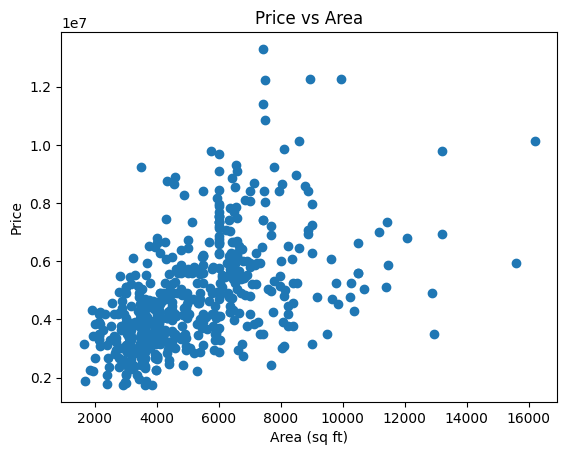

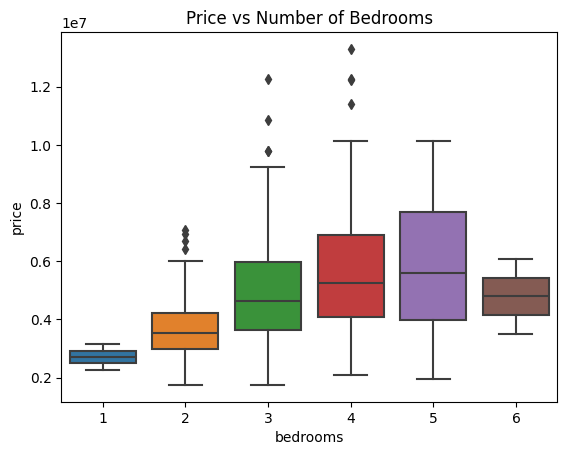

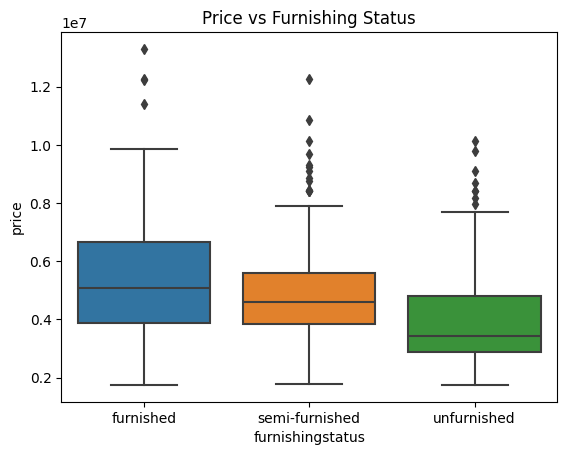

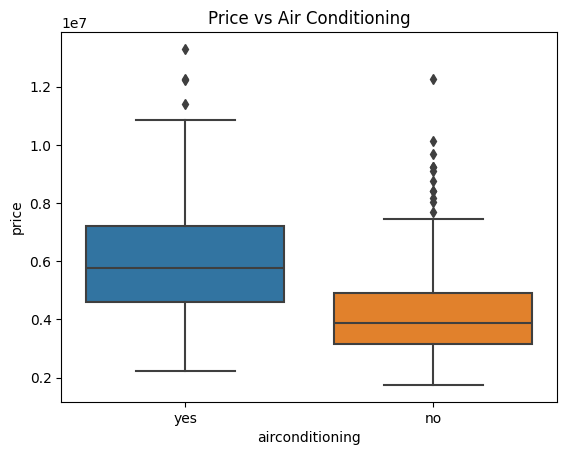

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("datasets/Housing.csv")

# Scatter plot: Price vs Area
plt.scatter(df["area"], df["price"])
plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.title("Price vs Area")
plt.show()

# Boxplot: Price vs Bedrooms
sns.boxplot(x="bedrooms", y="price", data=df)
plt.title("Price vs Number of Bedrooms")
plt.show()


# Boxplot: Price vs Furnishing Status
sns.boxplot(x="furnishingstatus", y="price", data=df)
plt.title("Price vs Furnishing Status")
plt.show()

# Boxplot: Price vs Air Conditioning
sns.boxplot(x="airconditioning", y="price", data=df)
plt.title("Price vs Air Conditioning")
plt.show()

# 3rd Program

c:\Users\amitj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\amitj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\amitj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


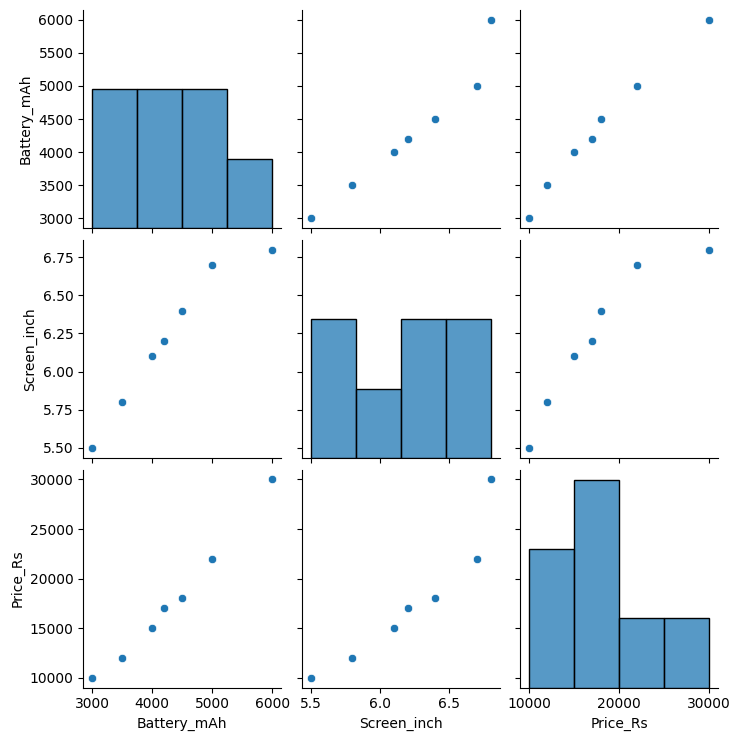

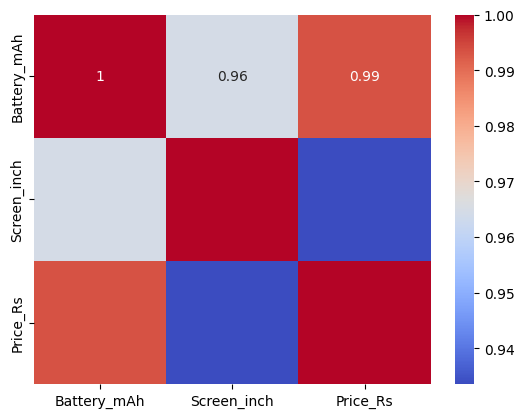

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Battery_mAh': [3000, 4000, 4500, 5000, 6000, 3500, 4200],
    'Screen_inch': [5.5, 6.1, 6.4, 6.7, 6.8, 5.8, 6.2],
    'Price_Rs': [10000, 15000, 18000, 22000, 30000, 12000, 17000]
}

df = pd.DataFrame(data)

sns.pairplot(df)
plt.show()

corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

# 4th Program

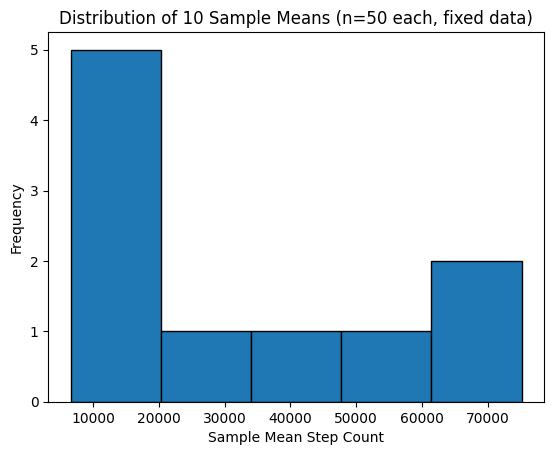

Smaple meane 31752.76531007752


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define a fixed right-skewed population (100 users for simplicity)
population = [
    3000, 3500, 4000, 4200, 4300, 4500, 4600, 4700, 4800, 5000,
    5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100,
    6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100,
    7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100,
    8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100,
    9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900, 10000, 10500,
    11000, 11500, 12000, 12500, 13000, 13500, 14000, 14500, 15000, 
    20000, 22000, 25000, 27000, 30000, 35000, 40000, 45000, 50000, 60000,
    70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000,
    160000, 170000, 180000, 190000, 200000, 210000, 220000, 230000, 240000, 250000
]

population = np.array(population)

# Step 2: Define 10 fixed samples (each of size 50)
samples = [
    population[0:50],
    population[10:60],
    population[20:70],
    population[30:80],
    population[40:90],
    population[50:100],
    np.concatenate([population[0:25], population[50:75]]),
    np.concatenate([population[10:35], population[60:85]]),
    np.concatenate([population[20:45], population[70:95]]),
    np.concatenate([population[5:30], population[80:105]])  # clipped at 100
]

# Step 3: Compute sample means
sample_means = [np.mean(s) for s in samples]

# Step 4: Plot histogram of sample means
plt.hist(sample_means, bins=5, edgecolor='black')
plt.xlabel("Sample Mean Step Count")
plt.ylabel("Frequency")
plt.title("Distribution of 10 Sample Means (n=50 each, fixed data)")
plt.show()

print("Sample mean",np.mean(sample_means))


# 5th Program - (pending)

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns

df = sns.load_dataset('titanic')

# WOE & IV function
def woe_iv(data, feature, target):
    temp = data[[feature, target]].dropna()
    groups = temp.groupby(feature)[target].agg(['count', 'sum'])
    
    good = groups['count'] - groups['sum']
    bad = groups['sum']
    
    good_pct = good / good.sum()
    bad_pct = bad / bad.sum()
    
    woe = np.log(good_pct / bad_pct)
    iv = ((good_pct - bad_pct) * woe).sum()
    
    return woe.to_dict(), iv

# Apply WOE to features and calculate IV
for col in ['sex', 'pclass']:
    woe_map, iv = woe_iv(df, col, 'survived')
    df[col + '_woe'] = df[col].map(woe_map)
    print(f"{col} - IV: {iv:.4f}")

print("\n", df[['sex', 'sex_woe', 'pclass', 'pclass_woe']])


sex - IV: 1.3417
pclass - IV: 0.5009

         sex   sex_woe  pclass  pclass_woe
0      male  0.983833       3    0.666483
1    female -1.529877       1   -1.003916
2    female -1.529877       3    0.666483
3    female -1.529877       1   -1.003916
4      male  0.983833       3    0.666483
..      ...       ...     ...         ...
886    male  0.983833       2   -0.364485
887  female -1.529877       1   -1.003916
888  female -1.529877       3    0.666483
889    male  0.983833       1   -1.003916
890    male  0.983833       3    0.666483

[891 rows x 4 columns]


In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Step 1: Documents (2 Sports + 2 Politics)
sports_docs = [
    "The football team won the championship after a thrilling match.",
    "The basketball player scored a record number of points this season."
]

politics_docs = [
    "The government passed a new policy to improve the education system.",
    "The election campaign focused on economic growth and healthcare reforms."
]

# Combine all documents
documents = sports_docs + politics_docs

# Step 2: Bag of Words (BoW)
bow = CountVectorizer()
bow_matrix = bow.fit_transform(documents)

print("Bag of Words Matrix:\n", bow_matrix.toarray())
print("Feature Names (Words):\n", bow.get_feature_names_out())

# Step 3: TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(documents)

print("\nTF-IDF Matrix:\n", tfidf_matrix.toarray())
print("Feature Names (Words):\n", tfidf.get_feature_names_out())

Bag of Words Matrix:
 [[1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 1 0 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 2 0 0 1 0]
 [0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0]]
Feature Names (Words):
 ['after' 'and' 'basketball' 'campaign' 'championship' 'economic'
 'education' 'election' 'focused' 'football' 'government' 'growth'
 'healthcare' 'improve' 'match' 'new' 'number' 'of' 'on' 'passed' 'player'
 'points' 'policy' 'record' 'reforms' 'scored' 'season' 'system' 'team'
 'the' 'this' 'thrilling' 'to' 'won']

TF-IDF Matrix:
 [[0.35159705 0.         0.         0.         0.35159705 0.
  0.         0.         0.         0.35159705 0.         0.
  0.         0.         0.35159705 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.35159705 0.36695585
  0.         0.35159705 0. 

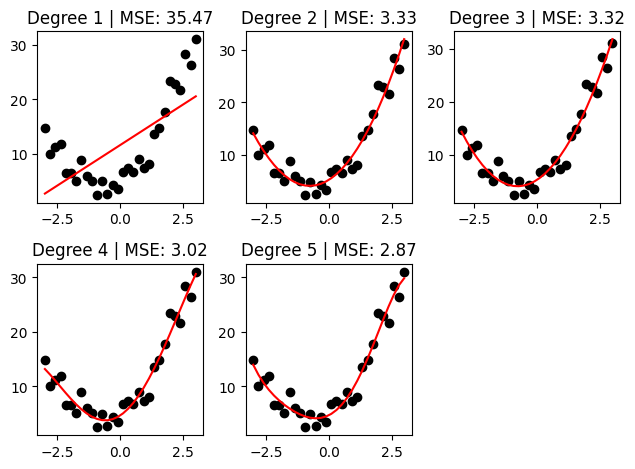

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = np.linspace(-3, 3, 30).reshape(-1, 1)
y = 2 * X**2 + 3 * X + 5 + np.random.randn(30, 1) * 2

# Try different degrees
degrees = [1, 2, 3, 4, 5]

for i, d in enumerate(degrees, 1):
    # Transform and fit
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # Predict and calculate error
    y_pred = model.predict(X_poly)
    mse = mean_squared_error(y, y_pred)
    
    # Plot
    plt.subplot(2, 3, i)
    plt.scatter(X, y, color='black')
    plt.plot(X, y_pred, color='red')
    plt.title(f'Degree {d} | MSE: {mse:.2f}')

plt.tight_layout()
plt.show()